# Logistic Regression
## 개요
다음과 같은 함수를 모델로 사용하는 회귀를 Logistic Regression 이라 한다.

$$\pi(X;\beta) = {1 \over {1+e^-({\beta_0 + \beta X}})} $$

이 때 $Y$ 는 (0, 1) 의 값을 가지기 때문에 일반적으로 Binary Classification (True/False) 문제에 쓰인다.

모델이 확률을 반환하여 특정 값(cut off, 일반적으로 0.5) 이상일 경우 True, 그렇지 않을 경우 False 로 판단 하는 형태로 문제를 해결한다.

## Loss Function
일반적으로는 Maximum Likelihood Function 이라는 다음 함수를 쓴다.

$$ L = \prod_{i=1}^n {\pi(X_i; \beta)^{y_i}(1-\pi(X_i; \beta))^{(1-y_i)}} $$

이 때 $X_i$는 각 요소 값, $y_i \in \{0, 1\}$는 분류를 뜻한다. 위 함수를 최대화 한다는 것은 음을 취한 함수를 최소화 한다는 것과 같다.

일반적으로 Loss function 은 실패를 뜻하기 때문에 최소화 할 수 있는 함수로 정한다. 따라서 원래 함수에 음을 취해 다음과 같이 정의하자.

$$ L = \prod_{i=1}^n -{\pi(X_i; \beta)^{y_i}(1-\pi(X_i; \beta))^{(1-y_i)}} $$

이 때 $L^* = \log L$ 로 정의 하자. 그렇다면 $L$ 을 최소화 하는 문제는 $L^*$을 최소화 하는 문제와 같다. 따라서,
A
$$ L^* = -\sum_{i=1}^n {y_i}\log{\pi(X_i; \beta)} - {(1-y_i)}\log{(1-\pi(X_i; \beta))}$$
$$ {\delta \over {\delta \beta}} L^* = -\sum_{i=1}^n
{y_i}{\delta \pi \over {\delta \beta}}{1 \over \pi} + (1-y_i){\delta \pi \over {\delta \beta}}{1 \over {1-\pi}} $$

이 때,

$$ {\delta \pi \over {\delta \beta}} = {{Xe^{-\beta X}} \over ({{1+e^{-\beta X}}})^2} = X\pi(1-\pi)$$

이므로

$$ {\delta \over {\delta \beta}} L^* = \sum_{i=1}^n X_i{(\pi-y_i)}$$

$X = \begin{bmatrix}X_1 \\ \cdots \\ X_n\end{bmatrix}$, $\pi = \begin{bmatrix}\pi_1 \\ \cdots \\ \pi_n\end{bmatrix}$, $y = \begin{bmatrix}y_1 \\ \cdots \\ y_n\end{bmatrix}$ 이라 하면

$$ {\delta \over {\delta \beta}} L^* = X^T(\pi-y) $$

따라서 Gradient Descent 방법을 이용 할 경우, 초기 $\beta$ 에서 $ \beta \to \beta - \alpha\sum_{i=1}^n X_i{(\pi-y_i)} $ 를 통해 최적화 하면 된다.

## 평가
로지스틱 회귀 모델은 대표적으로 두가지 방법으로 평가 할 수 있다.
1. Accuracy Score

(정답을 맞춘 데이터의 수) / (모든 데이터의 수)

2. 오차 행렬

오차 행렬은 다음과 같다.

$$ \begin{bmatrix}True Negative & False Positive \\ False Negative & True Positive\end{bmatrix} $$

오차 행렬을 통해 정밀도, 재현율 등을 알 수 있다.

## 실습: 위스콘신 유방암 환자 데이터

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split # 학습 데이터와 테스트 데이터를 분리 해주는 함수

from sklearn.datasets import load_breast_cancer # 유방암 환자 데이터

In [2]:
cancer = load_breast_cancer()

cancer['data'].shape

(569, 30)

In [3]:
df = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
df['target'] = cancer['target']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
# train_test_split
X_tr, X_tst, y_tr, y_tst = train_test_split(df.drop('target', axis=1), df['target'],  test_size=0.3)

X_tr.shape, X_tst.shape

((398, 30), (171, 30))

In [5]:
def standardize(X):
    return (X - X.mean()) / X.std()

def log_model(X, beta):
    return 1 / (1 + np.exp(-X.dot(beta)))

def loss(y, y_hat):
    return -np.sum(y.dot(np.log(y_hat)) + (1 - y).dot(1 - np.log(y_hat)))

def grad(X, y, y_hat):
    return (X.T).dot(y_hat - y)

def acc_score(y, y_hat, cut_off):
    return np.sum(y == (y_hat > cut_off)) / y.shape[0]

In [7]:
X_tr = standardize(X_tr)
X_tst = standardize(X_tst)
X_tr['constant'] = 1
X_tst['constant'] = 1

X_tr, y_tr, X_tst, y_tst = map(lambda data: np.array(data), [X_tr, y_tr, X_tst, y_tst]) # 빠른 연산을 위해 DataFrame 을 ndarray 로 형 변환

X_tr

array([[-0.33118091,  2.33294877, -0.3862047 , ..., -0.82334651,
        -1.09611336,  1.        ],
       [ 0.0523422 ,  1.81710787,  0.05121206, ..., -1.08138458,
        -0.04755833,  1.        ],
       [-0.07050505, -0.62861145, -0.13064516, ..., -0.92360334,
        -0.21651439,  1.        ],
       ...,
       [-1.11320851,  0.10668807, -1.11101692, ..., -1.06166192,
        -0.9488476 ,  1.        ],
       [-0.72069658, -0.69874772, -0.74948302, ..., -0.09360828,
         0.20473417,  1.        ],
       [ 0.32799944, -0.49060139,  0.26228854, ..., -0.82827717,
        -1.12807802,  1.        ]])

In [8]:
beta = np.random.random(31)

y_tst_hat = log_model(X_tst, beta)
initial_accuracy = acc_score(y_tst, y_tst_hat, 0.5)

initial_accuracy

0.1286549707602339

In [11]:
from tqdm import tqdm # progress bar

beta = np.random.random(31)
lr = 0.000001
itr_num = 10000
cut_off = 0.5
avg_loss = []
avg_acc = []
cum_loss, cum_acc = 0, 0

for itr in tqdm(range(1, itr_num + 1)):
    y_hat = log_model(X_tr, beta)
    y_tst_hat = log_model(X_tst, beta)
    l = loss(y_tr, y_hat)
    accuracy = acc_score(y_tst, y_tst_hat, cut_off)
    cum_loss += l
    cum_acc += accuracy
    
    avg_loss.append(cum_loss / itr)
    avg_acc.append(cum_acc / itr)
    
    beta -= lr * grad(X_tr, y_tr, y_hat)
    
    print(lr * grad(X_tr, y_tr, y_hat))
beta

  1%|          | 123/10000 [00:00<00:16, 611.41it/s]

[ 2.34503340e-04  1.41700380e-04  2.42975164e-04  2.32810546e-04
  1.52455334e-04  2.43769438e-04  2.72235159e-04  2.86538060e-04
  1.47884189e-04  5.43850046e-05  2.14907642e-04  3.54626886e-05
  2.12117034e-04  2.03845902e-04  1.50985940e-05  1.63673643e-04
  1.43741475e-04  1.94047780e-04  3.69505420e-05  9.16071186e-05
  2.55499655e-04  1.52260804e-04  2.61755868e-04  2.46799652e-04
  1.55468555e-04  2.30575828e-04  2.55584772e-04  2.83915085e-04
  1.47328183e-04  1.52041173e-04 -8.58598176e-05]
[ 2.34491397e-04  1.41706228e-04  2.42963322e-04  2.32799739e-04
  1.52456222e-04  2.43764392e-04  2.72227277e-04  2.86528558e-04
  1.47881613e-04  5.43898761e-05  2.14905532e-04  3.54760063e-05
  2.12114846e-04  2.03841126e-04  1.51119709e-05  1.63674230e-04
  1.43740169e-04  1.94045658e-04  3.69559137e-05  9.16097666e-05
  2.55488198e-04  1.52265035e-04  2.61744436e-04  2.46789506e-04
  1.55467276e-04  2.30568202e-04  2.55575280e-04  2.83903681e-04
  1.47321543e-04  1.52038263e-04 -8.5846

  2%|▏         | 232/10000 [00:00<00:16, 576.93it/s]

[ 2.32944530e-04  1.42459992e-04  2.41427395e-04  2.31402118e-04
  1.52519676e-04  2.43073763e-04  2.71183488e-04  2.85276079e-04
  1.47534022e-04  5.49920511e-05  2.14624391e-04  3.72009863e-05
  2.11820187e-04  2.03220276e-04  1.68078537e-05  1.63693798e-04
  1.43520260e-04  1.93696838e-04  3.76551675e-05  9.19226742e-05
  2.54004704e-04  1.52812455e-04  2.60262417e-04  2.45477602e-04
  1.55269223e-04  2.29557836e-04  2.54325218e-04  2.82401186e-04
  1.46467938e-04  1.51643599e-04 -8.41843706e-05]
[ 2.32931050e-04  1.42466535e-04  2.41413991e-04  2.31389956e-04
  1.52519795e-04  2.43067426e-04  2.71174196e-04  2.85264983e-04
  1.47530897e-04  5.49970560e-05  2.14621880e-04  3.72160290e-05
  2.11817525e-04  2.03214850e-04  1.68223398e-05  1.63693475e-04
  1.43517905e-04  1.93693173e-04  3.76612948e-05  9.19251556e-05
  2.53991781e-04  1.52817221e-04  2.60249489e-04  2.45466188e-04
  1.55267230e-04  2.29548835e-04  2.54314148e-04  2.82387880e-04
  1.46460561e-04  1.51640016e-04 -8.4170

  3%|▎         | 334/10000 [00:00<00:18, 524.15it/s]

[ 2.31187414e-04  1.43309147e-04  2.39677816e-04  2.29819315e-04
  1.52478750e-04  2.42204413e-04  2.69945994e-04  2.83806834e-04
  1.47117926e-04  5.56120552e-05  2.14289540e-04  3.91621238e-05
  2.11460293e-04  2.02511406e-04  1.86604217e-05  1.63583182e-04
  1.43153832e-04  1.93137852e-04  3.84588853e-05  9.22149687e-05
  2.52320958e-04  1.53431723e-04  2.58575611e-04  2.43992648e-04
  1.54976218e-04  2.28358053e-04  2.52859322e-04  2.80639929e-04
  1.45516273e-04  1.51158882e-04 -8.23454314e-05]
[ 2.31172006e-04  1.43316554e-04  2.39662453e-04  2.29805455e-04
  1.52477923e-04  2.42196422e-04  2.69934922e-04  2.83793763e-04
  1.47114212e-04  5.56172198e-05  2.14286536e-04  3.91793067e-05
  2.11457023e-04  2.02505177e-04  1.86763781e-05  1.63581628e-04
  1.43150118e-04  1.93132282e-04  3.84659770e-05  9.22172736e-05
  2.52306199e-04  1.53437124e-04  2.58560804e-04  2.43979649e-04
  1.54973379e-04  2.28347307e-04  2.52846276e-04  2.80624266e-04
  1.45508015e-04  1.51154486e-04 -8.2329

  4%|▍         | 428/10000 [00:00<00:19, 487.71it/s]

[ 2.29642010e-04  1.44047174e-04  2.38135277e-04  2.28430744e-04
  1.52361289e-04  2.41374628e-04  2.68818914e-04  2.82482352e-04
  1.46740508e-04  5.61091157e-05  2.13981604e-04  4.08800631e-05
  2.11122215e-04  2.01885140e-04  2.02393748e-05  1.63381880e-04
  1.42743822e-04  1.92531340e-04  3.91734166e-05  9.24264285e-05
  2.50840936e-04  1.53968600e-04  2.57089150e-04  2.42690532e-04
  1.54672486e-04  2.27262761e-04  2.51536622e-04  2.79053508e-04
  1.44695218e-04  1.50707241e-04 -8.07683424e-05]
[ 2.29624827e-04  1.44055313e-04  2.38118108e-04  2.28415321e-04
  1.52359622e-04  2.41365098e-04  2.68806206e-04  2.82467486e-04
  1.46736254e-04  5.61144179e-05  2.13978099e-04  4.08990765e-05
  2.11118338e-04  2.01878158e-04  2.02567013e-05  1.63379156e-04
  1.42738868e-04  1.92524106e-04  3.91813939e-05  9.24285670e-05
  2.50824481e-04  1.53974501e-04  2.57072607e-04  2.42676070e-04
  1.54668914e-04  2.27250396e-04  2.51521767e-04  2.79035712e-04
  1.44686166e-04  1.50702105e-04 -8.0751

  5%|▌         | 541/10000 [00:01<00:18, 520.03it/s]

[ 2.27802740e-04  1.44906718e-04  2.36295638e-04  2.26781199e-04
  1.52145322e-04  2.40321183e-04  2.67439977e-04  2.80876868e-04
  1.46276660e-04  5.66518752e-05  2.13594230e-04  4.28974461e-05
  2.10691478e-04  2.01134598e-04  2.20681120e-05  1.63037507e-04
  1.42172712e-04  1.91709217e-04  4.00299495e-05  9.26311569e-05
  2.49079419e-04  1.54588190e-04  2.55316223e-04  2.41143926e-04
  1.54270914e-04  2.25918720e-04  2.49931089e-04  2.77133334e-04
  1.43734495e-04  1.50144810e-04 -7.89350794e-05]
[ 2.27783447e-04  1.44915591e-04  2.36276322e-04  2.26763909e-04
  1.52142695e-04  2.40309799e-04  2.67425328e-04  2.80859891e-04
  1.46271693e-04  5.66573191e-05  2.13590024e-04  4.29183805e-05
  2.10686784e-04  2.01126685e-04  2.20870279e-05  1.63033372e-04
  1.42166328e-04  1.91700153e-04  4.00389531e-05  9.26330559e-05
  2.49060936e-04  1.54594541e-04  2.55297602e-04  2.41127714e-04
  1.54266521e-04  2.25904417e-04  2.49914098e-04  2.77113051e-04
  1.43724496e-04  1.50138782e-04 -7.8916

  7%|▋         | 655/10000 [00:01<00:17, 537.38it/s]

[ 2.25349003e-04  1.46004744e-04  2.33836279e-04  2.24583149e-04
  1.51763743e-04  2.38825646e-04  2.65551012e-04  2.78699438e-04
  1.45623237e-04  5.73073634e-05  2.13030975e-04  4.55108571e-05
  2.10062809e-04  2.00119760e-04  2.44317512e-05  1.62438775e-04
  1.41309861e-04  1.90506126e-04  4.11742913e-05  9.28337602e-05
  2.46726854e-04  1.55364998e-04  2.52943489e-04  2.39082168e-04
  1.53690277e-04  2.24070212e-04  2.47750070e-04  2.74537228e-04
  1.42471854e-04  1.49357868e-04 -7.65532227e-05]
[ 2.25327000e-04  1.46014282e-04  2.33814204e-04  2.24563443e-04
  1.51759941e-04  2.38811832e-04  2.65533857e-04  2.78679764e-04
  1.45617158e-04  5.73129217e-05  2.13025648e-04  4.55338030e-05
  2.10056872e-04  2.00110574e-04  2.44525680e-05  1.62432804e-04
  1.41301721e-04  1.90494974e-04  4.11845252e-05  9.28352289e-05
  2.46705737e-04  1.55371655e-04  2.52922170e-04  2.39063674e-04
  1.53684902e-04  2.24053387e-04  2.47730348e-04  2.74513826e-04
  1.42460594e-04  1.49350628e-04 -7.6532

  8%|▊         | 777/10000 [00:01<00:16, 559.90it/s]

[ 2.22412516e-04  1.47221063e-04  2.30886852e-04  2.21952054e-04
  1.51210639e-04  2.36926925e-04  2.63231328e-04  2.76053589e-04
  1.44770988e-04  5.80022763e-05  2.12272246e-04  4.84890296e-05
  2.09221498e-04  1.98878062e-04  2.71515731e-05  1.61564222e-04
  1.40176182e-04  1.88984769e-04  4.25291244e-05  9.29757022e-05
  2.43903758e-04  1.56198488e-04  2.50090514e-04  2.36610814e-04
  1.52954346e-04  2.21790446e-04  2.45096204e-04  2.71400858e-04
  1.40971998e-04  1.48361329e-04 -7.37839201e-05]
[ 2.22387483e-04  1.47230912e-04  2.30861682e-04  2.21929608e-04
  1.51205574e-04  2.36910292e-04  2.63211304e-04  2.76030867e-04
  1.44763350e-04  5.80078004e-05  2.12265355e-04  4.85136779e-05
  2.09213900e-04  1.98867335e-04  2.71742536e-05  1.61556157e-04
  1.40166162e-04  1.88971591e-04  4.25405500e-05  9.29764412e-05
  2.43879645e-04  1.56205096e-04  2.50066124e-04  2.36589709e-04
  1.52947937e-04  2.21770731e-04  2.45073404e-04  2.71374028e-04
  1.40959210e-04  1.48352559e-04 -7.3760

  9%|▉         | 891/10000 [00:01<00:17, 524.64it/s]

[ 2.19143609e-04  1.48425956e-04  2.27596782e-04  2.19017000e-04
  1.50509481e-04  2.34698257e-04  2.60582780e-04  2.73063619e-04
  1.43719045e-04  5.86669411e-05  2.11312454e-04  5.16031595e-05
  2.08170271e-04  1.97456757e-04  3.00404587e-05  1.60438282e-04
  1.38828336e-04  1.87249173e-04  4.39961799e-05  9.30035420e-05
  2.40747628e-04  1.56986169e-04  2.46895150e-04  2.33847622e-04
  1.52103303e-04  2.19180113e-04  2.42095920e-04  2.67887246e-04
  1.39296130e-04  1.47172975e-04 -7.07908980e-05]
[ 2.19115437e-04  1.48435605e-04  2.27568400e-04  2.18991665e-04
  1.50503121e-04  2.34678582e-04  2.60559664e-04  2.73037651e-04
  1.43709514e-04  5.86721736e-05  2.11303670e-04  5.16290965e-05
  2.08160711e-04  1.97444331e-04  3.00647129e-05  1.60427994e-04
  1.38816412e-04  1.87234127e-04  4.40085792e-05  9.30031756e-05
  2.40720362e-04  1.56992286e-04  2.46867521e-04  2.33823738e-04
  1.52095862e-04  2.19157320e-04  2.42069869e-04  2.67856889e-04
  1.39281622e-04  1.47162341e-04 -7.0765

 10%|█         | 1005/10000 [00:01<00:17, 519.31it/s]

[ 2.16225603e-04  1.49355181e-04  2.24654522e-04  2.16388448e-04
  1.49825700e-04  2.32622127e-04  2.58162961e-04  2.70355717e-04
  1.42694518e-04  5.91647427e-05  2.10359426e-04  5.42098345e-05
  2.07138505e-04  1.96154507e-04  3.24931848e-05  1.59327018e-04
  1.37570138e-04  1.85686666e-04  4.52553824e-05  9.29105565e-05
  2.37917351e-04  1.57557070e-04  2.44025307e-04  2.31366807e-04
  1.51325076e-04  2.16794992e-04  2.39381312e-04  2.64737295e-04
  1.37787601e-04  1.46034736e-04 -6.81936164e-05]
[ 2.16194776e-04  1.49364227e-04  2.24623414e-04  2.16360630e-04
  1.49818219e-04  2.32599803e-04  2.58137127e-04  2.70326915e-04
  1.42683328e-04  5.91695344e-05  2.10348914e-04  5.42365153e-05
  2.07127179e-04  1.96140593e-04  3.25184474e-05  1.59314817e-04
  1.37556616e-04  1.85670126e-04  4.52684063e-05  9.29089864e-05
  2.37887388e-04  1.57562418e-04  2.43994904e-04  2.31340522e-04
  1.51316784e-04  2.16769550e-04  2.39352466e-04  2.64703965e-04
  1.37771613e-04  1.46022316e-04 -6.8166

 11%|█         | 1121/10000 [00:02<00:16, 525.32it/s]

[ 2.12665364e-04  1.50289680e-04  2.21058604e-04  2.13168937e-04
  1.48928978e-04  2.29996455e-04  2.55144521e-04  2.67003593e-04
  1.41364170e-04  5.96579919e-05  2.09091069e-04  5.71720276e-05
  2.05778958e-04  1.94528545e-04  3.53182443e-05  1.57862244e-04
  1.35981788e-04  1.83773441e-04  4.67202129e-05  9.26515402e-05
  2.34449003e-04  1.58078461e-04  2.40503853e-04  2.28321019e-04
  1.50359711e-04  2.13827496e-04  2.36029424e-04  2.60883090e-04
  1.35939723e-04  1.44549076e-04 -6.51211742e-05]
[ 2.12631389e-04  1.50297515e-04  2.21024259e-04  2.13138149e-04
  1.48920109e-04  2.29970969e-04  2.55115392e-04  2.66971361e-04
  1.41351175e-04  5.96621456e-05  2.09078475e-04  5.71991293e-05
  2.05765522e-04  1.94512857e-04  3.53442883e-05  1.57847762e-04
  1.35966395e-04  1.83755154e-04  4.67338141e-05  9.26483414e-05
  2.34415834e-04  1.58082494e-04  2.40470155e-04  2.28291858e-04
  1.50350431e-04  2.13798919e-04  2.35997256e-04  2.60846275e-04
  1.35922111e-04  1.44534427e-04 -6.5092

 12%|█▏        | 1235/10000 [00:02<00:16, 547.11it/s]


[ 2.08480547e-04  1.51100123e-04  2.16824507e-04  2.09368307e-04
  1.47792411e-04  2.26804817e-04  2.51515453e-04  2.63002065e-04
  1.39739581e-04  6.01018295e-05  2.07481323e-04  6.03438932e-05
  2.04069325e-04  1.92575611e-04  3.83913171e-05  1.56016001e-04
  1.34058352e-04  1.81514843e-04  4.83452175e-05  9.21648677e-05
  2.30354989e-04  1.58441175e-04  2.36342205e-04  2.24716989e-04
  1.49206518e-04  2.10277684e-04  2.32046256e-04  2.56346519e-04
  1.33783689e-04  1.42687987e-04 -6.16536429e-05]
[ 2.08442886e-04  1.51106016e-04  2.16786370e-04  2.09334033e-04
  1.47781769e-04  2.26775651e-04  2.51482442e-04  2.62965782e-04
  1.39724814e-04  6.01052579e-05  2.07466350e-04  6.03709314e-05
  2.04053488e-04  1.92557864e-04  3.84177181e-05  1.55998851e-04
  1.34040815e-04  1.81494444e-04  4.83594039e-05  9.21596989e-05
  2.30318074e-04  1.58443223e-04  2.36304662e-04  2.24684450e-04
  1.49196032e-04  2.10245491e-04  2.32010240e-04  2.56305685e-04
  1.33764445e-04  1.42670773e-04 -6.162

 13%|█▎        | 1291/10000 [00:02<00:18, 478.76it/s]


[ 2.04171515e-04  1.51619873e-04  2.12457787e-04  2.05439893e-04
  1.46523079e-04  2.23423125e-04  2.47703358e-04  2.58822549e-04
  1.38043474e-04  6.04399233e-05  2.05721691e-04  6.32728244e-05
  2.02214705e-04  1.90528332e-04  4.12637513e-05  1.53998802e-04
  1.32029812e-04  1.79167133e-04  4.99234326e-05  9.14960746e-05
  2.26124248e-04  1.58540749e-04  2.32037678e-04  2.20983030e-04
  1.47987237e-04  2.06569979e-04  2.27909588e-04  2.51674298e-04
  1.31604700e-04  1.40676137e-04 -5.82529052e-05]
[ 2.04130005e-04  1.51623418e-04  2.12415690e-04  2.05401987e-04
  1.46510317e-04  2.23390132e-04  2.47666312e-04  2.58782024e-04
  1.38027093e-04  6.04426944e-05  2.05704323e-04  6.32994980e-05
  2.02196458e-04  1.90508455e-04  4.12899644e-05  1.53978855e-04
  1.32010067e-04  1.79144351e-04  4.99382226e-05  9.14889377e-05
  2.26083424e-04  1.58540427e-04  2.31996127e-04  2.20946954e-04
  1.47975255e-04  2.06534034e-04  2.27869592e-04  2.51629281e-04
  1.31583930e-04  1.40656387e-04 -5.822

 14%|█▍        | 1405/10000 [00:02<00:16, 514.10it/s]


[ 1.99875394e-04  1.51851712e-04  2.08098129e-04  2.01511409e-04
  1.45142577e-04  2.19969683e-04  2.43840322e-04  2.54603917e-04
  1.36343909e-04  6.06842502e-05  2.03888097e-04  6.58943810e-05
  2.00293372e-04  1.88456579e-04  4.38310427e-05  1.51886481e-04
  1.29967543e-04  1.76786781e-04  5.14167489e-05  9.06990017e-05
  2.21892283e-04  1.58387504e-04  2.27729210e-04  2.17238565e-04
  1.46713308e-04  2.02827769e-04  2.23756469e-04  2.47012156e-04
  1.29473966e-04  1.38601788e-04 -5.50315785e-05]
[ 1.99830020e-04  1.51852776e-04  2.08052054e-04  2.01469862e-04
  1.45127325e-04  2.19932800e-04  2.43799224e-04  2.54559105e-04
  1.36325898e-04  6.06863967e-05  2.03868365e-04  6.59206623e-05
  2.00272747e-04  1.88434542e-04  4.38566134e-05  1.51863673e-04
  1.29945565e-04  1.76761369e-04  5.14321351e-05  9.06900087e-05
  2.21847510e-04  1.58384649e-04  2.27683616e-04  2.17198898e-04
  1.46699437e-04  2.02788005e-04  2.23712455e-04  2.46962865e-04
  1.29451633e-04  1.38579579e-04 -5.499

 15%|█▌        | 1513/10000 [00:02<00:17, 489.58it/s]

[ 1.94734898e-04  1.51808431e-04  2.02874510e-04  1.96797150e-04
  1.43318865e-04  2.15738870e-04  2.39147407e-04  2.49494092e-04
  1.34288374e-04  6.08736587e-05  2.01608252e-04  6.87070813e-05
  1.97916371e-04  1.85938340e-04  4.65343754e-05  1.49240815e-04
  1.27452303e-04  1.73865560e-04  5.31110759e-05  8.96173728e-05
  2.16808558e-04  1.57915271e-04  2.22551077e-04  2.12726572e-04
  1.45074049e-04  1.98289294e-04  2.18748449e-04  2.41415727e-04
  1.26955783e-04  1.36050527e-04 -5.13856627e-05]
[ 1.94684990e-04  1.51806487e-04  2.02823759e-04  1.96751306e-04
  1.43300190e-04  2.15697286e-04  2.39101490e-04  2.49444159e-04
  1.34268230e-04  6.08749746e-05  2.01585691e-04  6.87328444e-05
  1.97892906e-04  1.85913669e-04  4.65587873e-05  1.49214542e-04
  1.27427637e-04  1.73836761e-04  5.31270418e-05  8.96063121e-05
  2.16759084e-04  1.57909292e-04  2.22500673e-04  2.12682576e-04
  1.45057416e-04  1.98244891e-04  2.18699603e-04  2.41361245e-04
  1.26931398e-04  1.36025427e-04 -5.1351

 16%|█▌        | 1617/10000 [00:03<00:17, 483.01it/s]


[ 1.90015209e-04  1.51508250e-04  1.98072199e-04  1.92454685e-04
  1.41469369e-04  2.11764341e-04  2.34775728e-04  2.44744472e-04
  1.32361781e-04  6.09539897e-05  1.99439101e-04  7.10197687e-05
  1.95665059e-04  1.83584328e-04  4.87021733e-05  1.46710203e-04
  1.25099761e-04  1.71103449e-04  5.45776428e-05  8.85322068e-05
  2.12118639e-04  1.57241970e-04  2.17772360e-04  2.08547257e-04
  1.43435851e-04  1.94059925e-04  2.14107855e-04  2.36246862e-04
  1.24647134e-04  1.33650334e-04 -4.82248704e-05]
[ 1.89961328e-04  1.51503525e-04  1.98017342e-04  1.92405022e-04
  1.41447290e-04  2.11718486e-04  2.34725479e-04  2.44689926e-04
  1.32339510e-04  6.09543912e-05  1.99413921e-04  7.10447396e-05
  1.95638981e-04  1.83557198e-04  4.87253694e-05  1.46680798e-04
  1.25072677e-04  1.71071469e-04  5.45938587e-05  8.85194009e-05
  2.12064962e-04  1.57233076e-04  2.17717660e-04  2.08499314e-04
  1.43416383e-04  1.94011285e-04  2.14054618e-04  2.36187643e-04
  1.24620712e-04  1.33622632e-04 -4.818

 17%|█▋        | 1718/10000 [00:03<00:17, 466.87it/s]

[ 1.85104106e-04  1.50966157e-04  1.93069175e-04  1.87918530e-04
  1.39371230e-04  2.07542209e-04  2.30164045e-04  2.39742252e-04
  1.30302913e-04  6.09427563e-05  1.97104435e-04  7.31618936e-05
  1.93252710e-04  1.81085379e-04  5.06896519e-05  1.43986605e-04
  1.22611807e-04  1.68149123e-04  5.60018559e-05  8.73327527e-05
  2.07212670e-04  1.56327121e-04  2.12772523e-04  2.04153123e-04
  1.41592251e-04  1.89593158e-04  2.09229677e-04  2.30827270e-04
  1.22227318e-04  1.31098663e-04 -4.51191140e-05]
[ 1.85046318e-04  1.50958478e-04  1.93010271e-04  1.87865031e-04
  1.39345546e-04  2.07492028e-04  2.30109398e-04  2.39683021e-04
  1.30278327e-04  6.09420505e-05  1.97076480e-04  7.31854683e-05
  1.93223894e-04  1.81055646e-04  5.07116129e-05  1.43954062e-04
  1.22582311e-04  1.68113905e-04  5.60179330e-05  8.73182855e-05
  2.07154776e-04  1.56315141e-04  2.12713518e-04  2.04101111e-04
  1.41569750e-04  1.89540199e-04  2.09171957e-04  2.30763225e-04
  1.22198681e-04  1.31068325e-04 -4.5083

 18%|█▊        | 1766/10000 [00:03<00:18, 447.43it/s]

[ 1.79661238e-04  1.50116337e-04  1.87517886e-04  1.82865091e-04
  1.36860215e-04  2.02767940e-04  2.24977519e-04  2.34124398e-04
  1.27949514e-04  6.08190216e-05  1.94420380e-04  7.52119771e-05
  1.90493783e-04  1.78248368e-04  5.26322303e-05  1.40877124e-04
  1.19814055e-04  1.64790731e-04  5.74396927e-05  8.59404850e-05
  2.01741971e-04  1.55081496e-04  2.07197078e-04  1.99219693e-04
  1.39397743e-04  1.84565439e-04  2.03759151e-04  2.24765980e-04
  1.19509113e-04  1.28211341e-04 -4.18996831e-05]
[ 1.79599341e-04  1.50105230e-04  1.87454718e-04  1.82807441e-04
  1.36830658e-04  2.02713108e-04  2.24918074e-04  2.34060051e-04
  1.27922314e-04  6.08169616e-05  1.94389253e-04  7.52332985e-05
  1.90461882e-04  1.78215665e-04  5.26529637e-05  1.40841284e-04
  1.19782030e-04  1.64752095e-04  5.74551185e-05  8.59243415e-05
  2.01679546e-04  1.55066000e-04  2.07133463e-04  1.99163168e-04
  1.39371962e-04  1.84507810e-04  2.03696537e-04  2.24696710e-04
  1.19477937e-04  1.28178170e-04 -4.1864

 19%|█▊        | 1861/10000 [00:03<00:20, 404.57it/s]

[ 1.74824901e-04  1.49153272e-04  1.82579860e-04  1.78347049e-04
  1.34491831e-04  1.98449512e-04  2.20300833e-04  2.29064585e-04
  1.25795422e-04  6.06159499e-05  1.91946385e-04  7.67437828e-05
  1.87965281e-04  1.75661579e-04  5.41715898e-05  1.38049097e-04
  1.17300471e-04  1.61746901e-04  5.85785175e-05  8.46619282e-05
  1.96849801e-04  1.53784202e-04  2.02212256e-04  1.94772620e-04
  1.37334001e-04  1.80033385e-04  1.98839198e-04  2.19330961e-04
  1.17053097e-04  1.25598406e-04 -3.92470991e-05]
[ 1.74759455e-04  1.49138931e-04  1.82513005e-04  1.78285712e-04
  1.34459022e-04  1.98390614e-04  2.20237100e-04  2.28995664e-04
  1.25765880e-04  6.06126329e-05  1.91912321e-04  7.67626714e-05
  1.87930565e-04  1.75626127e-04  5.41913620e-05  1.38010474e-04
  1.17266317e-04  1.61705399e-04  5.85929878e-05  8.46444098e-05
  1.96783395e-04  1.53765467e-04  2.02144604e-04  1.94712006e-04
  1.37305430e-04  1.79971660e-04  1.98772236e-04  2.19257105e-04
  1.17019571e-04  1.25562763e-04 -3.9212

 20%|█▉        | 1958/10000 [00:03<00:18, 430.34it/s]

[ 1.68599319e-04  1.47636520e-04  1.76216377e-04  1.72486673e-04
  1.31295178e-04  1.92794890e-04  2.14183734e-04  2.22453217e-04
  1.22940661e-04  6.02369013e-05  1.88635313e-04  7.83318640e-05
  1.84603636e-04  1.72233619e-04  5.59395757e-05  1.34340451e-04
  1.14039975e-04  1.57770924e-04  5.98402870e-05  8.29747628e-05
  1.90508265e-04  1.51867173e-04  1.95753501e-04  1.88951728e-04
  1.34549547e-04  1.74116868e-04  1.92423995e-04  2.12270821e-04
  1.13826304e-04  1.22176176e-04 -3.61432606e-05]
[ 1.68529318e-04  1.47617740e-04  1.76144781e-04  1.72420472e-04
  1.31258453e-04  1.92730728e-04  2.14114321e-04  2.22378236e-04
  1.22908065e-04  6.02319370e-05  1.88597273e-04  7.83474211e-05
  1.84565163e-04  1.72194427e-04  5.59582284e-05  1.34298399e-04
  1.14003213e-04  1.57725958e-04  5.98531554e-05  8.29555830e-05
  1.90436679e-04  1.51844112e-04  1.95680614e-04  1.88885634e-04
  1.34517532e-04  1.74049843e-04  1.92351347e-04  2.12191059e-04
  1.13789576e-04  1.22137344e-04 -3.6110

 21%|██        | 2063/10000 [00:04<00:16, 470.08it/s]

[ 1.60882678e-04  1.45346231e-04  1.68317918e-04  1.65145657e-04
  1.27164190e-04  1.85647178e-04  2.06446142e-04  2.14100170e-04
  1.19284678e-04  5.96024122e-05  1.84335284e-04  7.97745078e-05
  1.80274538e-04  1.67824747e-04  5.78476831e-05  1.29669564e-04
  1.09982997e-04  1.52796218e-04  6.10865969e-05  8.08393670e-05
  1.82579969e-04  1.49138341e-04  1.87684406e-04  1.81577249e-04
  1.30940503e-04  1.66665295e-04  1.84350734e-04  2.03434648e-04
  1.09715850e-04  1.17850705e-04 -3.28132423e-05]
[ 1.60806933e-04  1.45321624e-04  1.68240327e-04  1.65073158e-04
  1.27122911e-04  1.85576276e-04  2.06369330e-04  2.14017301e-04
  1.19248182e-04  5.95953392e-05  1.84292025e-04  7.97861590e-05
  1.80231181e-04  1.67780579e-04  5.78649992e-05  1.29623413e-04
  1.09943174e-04  1.52747294e-04  6.10971520e-05  8.08182244e-05
  1.82501786e-04  1.49109783e-04  1.87604864e-04  1.81503973e-04
  1.30904344e-04  1.66591541e-04  1.84270870e-04  2.03347521e-04
  1.09674886e-04  1.17807807e-04 -3.2783

 22%|██▏       | 2166/10000 [00:04<00:17, 455.20it/s]

[ 1.53346374e-04  1.42712543e-04  1.60591579e-04  1.57889596e-04
  1.23000943e-04  1.78522047e-04  1.98721857e-04  2.05772348e-04
  1.15597939e-04  5.88215781e-05  1.79934658e-04  8.07343547e-05
  1.75880562e-04  1.63344505e-04  5.94455561e-05  1.25055313e-04
  1.06027385e-04  1.47932096e-04  6.19878704e-05  7.87219406e-05
  1.74768772e-04  1.46147810e-04  1.79738955e-04  1.74202624e-04
  1.27282267e-04  1.59271694e-04  1.76352796e-04  1.94736489e-04
  1.05583959e-04  1.13541277e-04 -3.01232608e-05]
[ 1.53265008e-04  1.42682169e-04  1.60508089e-04  1.57810785e-04
  1.22955428e-04  1.78444336e-04  1.98637566e-04  2.05681537e-04
  1.15557535e-04  5.88123093e-05  1.79886099e-04  8.07427199e-05
  1.75832245e-04  1.63295185e-04  5.94614677e-05  1.25005265e-04
  1.05984774e-04  1.47879666e-04  6.19960268e-05  7.86989362e-05
  1.74684095e-04  1.46113990e-04  1.79652828e-04  1.74122089e-04
  1.27242141e-04  1.59191272e-04  1.76265920e-04  1.94642297e-04
  1.05538758e-04  1.13494298e-04 -3.0097

 23%|██▎       | 2261/10000 [00:04<00:17, 442.63it/s]

[ 1.45873140e-04  1.39769618e-04  1.52916318e-04  1.50609920e-04
  1.18776723e-04  1.71313993e-04  1.90901918e-04  1.97355006e-04
  1.11835775e-04  5.78971674e-05  1.75383752e-04  8.13553416e-05
  1.71364184e-04  1.58728907e-04  6.07922021e-05  1.20438278e-04
  1.02123625e-04  1.43127946e-04  6.26086471e-05  7.65960769e-05
  1.66963209e-04  1.42924484e-04  1.71797750e-04  1.66727467e-04
  1.23545151e-04  1.51834768e-04  1.68334688e-04  1.86066446e-04
  1.01386240e-04  1.09186843e-04 -2.79731847e-05]
[ 1.45786559e-04  1.39733820e-04  1.52827313e-04  1.50525102e-04
  1.18727293e-04  1.71229649e-04  1.90810408e-04  1.97256607e-04
  1.11791595e-04  5.78856016e-05  1.75329958e-04  8.13609383e-05
  1.71310916e-04  1.58674410e-04  6.08064587e-05  1.20384534e-04
  1.02078507e-04  1.43072418e-04  6.26143841e-05  7.65712827e-05
  1.66872458e-04  1.42885858e-04  1.71705382e-04  1.66639962e-04
  1.23501259e-04  1.51748028e-04  1.68241377e-04  1.85965808e-04
  1.01337105e-04  1.09135933e-04 -2.7951

 24%|██▎       | 2351/10000 [00:04<00:18, 408.89it/s]


[ 1.37688950e-04  1.36234614e-04  1.44493962e-04  1.42546468e-04
  1.14058073e-04  1.63257637e-04  1.82161238e-04  1.87971093e-04
  1.07601022e-04  5.67194563e-05  1.70190399e-04  8.17459244e-05
  1.66229074e-04  1.53472302e-04  6.20044541e-05  1.15326275e-04
  9.78628263e-05  1.37885004e-04  6.30157429e-05  7.42306484e-05
  1.58355481e-04  1.39161661e-04  1.63028617e-04  1.58371289e-04
  1.19335829e-04  1.43580579e-04  1.59477739e-04  1.76537705e-04
  9.67001110e-05  1.04328553e-04 -2.61297390e-05]
[ 1.37597799e-04  1.36193619e-04  1.44400056e-04  1.42456163e-04
  1.14005000e-04  1.63166967e-04  1.82062862e-04  1.87865680e-04
  1.07553190e-04  5.67053898e-05  1.70131314e-04  8.17487883e-05
  1.66170710e-04  1.53412550e-04  6.20164056e-05  1.15268924e-04
  9.78153469e-05  1.37826599e-04  6.30187967e-05  7.42040094e-05
  1.58259295e-04  1.39118554e-04  1.62930516e-04  1.58277311e-04
  1.19288243e-04  1.43488040e-04  1.59378683e-04  1.76431402e-04
  9.66474921e-05  1.04273919e-04 -2.611

 24%|██▍       | 2450/10000 [00:05<00:17, 438.28it/s]

[ 1.30291859e-04  1.32798836e-04  1.36865817e-04  1.35186784e-04
  1.09712253e-04  1.55832316e-04  1.74102708e-04  1.79356825e-04
  1.03668098e-04  5.55100929e-05  1.65303434e-04  8.18778372e-05
  1.61402433e-04  1.48535584e-04  6.28603585e-05  1.10631894e-04
  9.39939238e-05  1.33128792e-04  6.31633452e-05  7.20386707e-05
  1.50528998e-04  1.35581288e-04  1.55035553e-04  1.50687642e-04
  1.15417844e-04  1.36027598e-04  1.51405230e-04  1.67894811e-04
  9.24032778e-05  9.98540583e-05 -2.48288546e-05]
[ 1.30198388e-04  1.32754016e-04  1.36769329e-04  1.35093414e-04
  1.09656810e-04  1.55737609e-04  1.73999882e-04  1.79247220e-04
  1.03617694e-04  5.54939211e-05  1.65240458e-04  8.18782030e-05
  1.61340227e-04  1.48472059e-04  6.28696687e-05  1.10571973e-04
  9.39447200e-05  1.33068355e-04  6.31639332e-05  7.20105092e-05
  1.50429841e-04  1.35534965e-04  1.54934132e-04  1.50589867e-04
  1.15367553e-04  1.35931583e-04  1.51302725e-04  1.67785346e-04
  9.23486422e-05  9.97969493e-05 -2.4814

 25%|██▌       | 2548/10000 [00:05<00:16, 451.53it/s]

[ 1.19808327e-04  1.27541853e-04  1.26028602e-04  1.24671239e-04
  1.03397453e-04  1.45063802e-04  1.62400258e-04  1.66950446e-04
  9.78789243e-05  5.35467892e-05  1.58034153e-04  8.17054735e-05
  1.54214784e-04  1.41228106e-04  6.36559941e-05  1.03781932e-04
  8.83790034e-05  1.26245885e-04  6.30312209e-05  6.87756968e-05
  1.39369266e-04  1.30198424e-04  1.43592512e-04  1.39636409e-04
  1.09629510e-04  1.25157094e-04  1.39798397e-04  1.55555576e-04
  8.62166748e-05  9.33370983e-05 -2.34001281e-05]
[ 1.19715325e-04  1.27493028e-04  1.25932321e-04  1.24577638e-04
  1.03340467e-04  1.44966867e-04  1.62294810e-04  1.66839359e-04
  9.78261605e-05  5.35279296e-05  1.57967694e-04  8.17019178e-05
  1.54148980e-04  1.41161589e-04  6.36607161e-05  1.03719791e-04
  8.83280651e-05  1.26183598e-04  6.30282209e-05  6.87456229e-05
  1.39269918e-04  1.30148835e-04  1.43490363e-04  1.39537706e-04
  1.09576674e-04  1.25059646e-04  1.39694242e-04  1.55445413e-04
  8.61611912e-05  9.32781235e-05 -2.3389

 26%|██▌       | 2595/10000 [00:05<00:17, 426.42it/s]

[ 1.11829098e-04  1.23200277e-04  1.17758534e-04  1.16627793e-04
  9.84360940e-05  1.36645665e-04  1.53237267e-04  1.57351787e-04
  9.32403552e-05  5.18237939e-05  1.52191227e-04  8.12583978e-05
  1.48420845e-04  1.35405875e-04  6.39011397e-05  9.83406630e-05
  8.39111976e-05  1.20794795e-04  6.26474770e-05  6.61040736e-05
  1.30822080e-04  1.25810893e-04  1.34784613e-04  1.31133603e-04
  1.04986004e-04  1.16720109e-04  1.30767338e-04  1.46045306e-04
  8.14072580e-05  8.81865175e-05 -2.25292248e-05]
[ 1.11738972e-04  1.23149434e-04  1.17665011e-04  1.16536822e-04
  9.83791771e-05  1.36549350e-04  1.53132382e-04  1.57242568e-04
  9.31865697e-05  5.18030549e-05  1.52123519e-04  8.12516514e-05
  1.48353595e-04  1.35338733e-04  6.39020128e-05  9.82778423e-05
  8.38595115e-05  1.20731874e-04  6.26416111e-05  6.60727620e-05
  1.30725255e-04  1.25759746e-04  1.34684600e-04  1.31037187e-04
  1.04932223e-04  1.16623883e-04  1.30664174e-04  1.45937157e-04
  8.13523066e-05  8.81272281e-05 -2.2520

 27%|██▋       | 2690/10000 [00:05<00:17, 408.46it/s]


[ 1.04933998e-04  1.19192320e-04  1.10595977e-04  1.09662587e-04
  9.40208647e-05  1.29191128e-04  1.45119746e-04  1.48942102e-04
  8.90250240e-05  5.01476670e-05  1.46890438e-04  8.06276816e-05
  1.43147685e-04  1.30173616e-04  6.38412594e-05  9.34378820e-05
  7.98703364e-05  1.15883496e-04  6.20892228e-05  6.36279823e-05
  1.23394272e-04  1.21792218e-04  1.27096495e-04  1.23733557e-04
  1.00781577e-04  1.09294484e-04  1.22797310e-04  1.37720313e-04
  7.71551199e-05  8.35738367e-05 -2.18827624e-05]
[ 1.04847491e-04  1.19140524e-04  1.10506016e-04  1.09575139e-04
  9.39646711e-05  1.29096467e-04  1.45016695e-04  1.48835888e-04
  8.89707950e-05  5.01254518e-05  1.46822318e-04  8.06182729e-05
  1.43079809e-04  1.30106701e-04  6.38388596e-05  9.33750886e-05
  7.98185003e-05  1.15820577e-04  6.20807336e-05  6.35958491e-05
  1.23300808e-04  1.21740441e-04  1.26999554e-04  1.23640404e-04
  1.00727664e-04  1.09200493e-04  1.22696333e-04  1.37615201e-04
  7.71011101e-05  8.35149680e-05 -2.187

 28%|██▊       | 2775/10000 [00:05<00:18, 395.23it/s]


[ 9.70362882e-05  1.14314207e-04  1.02372703e-04  1.01673914e-04
  8.88058883e-05  1.20428341e-04  1.35589905e-04  1.39170796e-04
  8.39284674e-05  4.79925164e-05  1.40492616e-04  7.96124941e-05
  1.36760967e-04  1.23925889e-04  6.34508879e-05  8.75677696e-05
  7.50192621e-05  1.09997402e-04  6.11425889e-05  6.05804047e-05
  1.14830653e-04  1.16929902e-04  1.18194265e-04  1.15194901e-04
  9.57419479e-05  1.00630800e-04  1.13486068e-04  1.28055745e-04
  7.21474453e-05  7.80989630e-05 -2.12357204e-05]
[ 9.69549434e-05  1.14262426e-04  1.02287896e-04  1.01591582e-04
  8.87512667e-05  1.20336799e-04  1.35490494e-04  1.39069359e-04
  8.38744033e-05  4.79689582e-05  1.40424763e-04  7.96003747e-05
  1.36693105e-04  1.23860031e-04  6.34450493e-05  8.75058335e-05
  7.49680445e-05  1.09935232e-04  6.11308992e-05  6.05477941e-05
  1.14742112e-04  1.16878423e-04  1.18102019e-04  1.15106580e-04
  9.56888225e-05  1.00540728e-04  1.13389259e-04  1.27955488e-04
  7.20950079e-05  7.80415421e-05 -2.122

 29%|██▊       | 2855/10000 [00:06<00:18, 377.86it/s]


[ 9.17203602e-05  1.10866586e-04  9.68257514e-05  9.62914663e-05
  8.51958080e-05  1.14389873e-04  1.29041626e-04  1.32506617e-04
  8.03253502e-05  4.63931094e-05  1.35968917e-04  7.87470664e-05
  1.32231211e-04  1.19554113e-04  6.29897369e-05  8.34545156e-05
  7.16179481e-05  1.05863656e-04  6.02839132e-05  5.83952004e-05
  1.09029130e-04  1.13507332e-04  1.12141917e-04  1.09406078e-04
  9.22194990e-05  9.47117463e-05  1.07126331e-04  1.21473588e-04
  6.86798956e-05  7.43048053e-05 -2.08396032e-05]
[ 9.16431366e-05  1.10815556e-04  9.67450993e-05  9.62132467e-05
  8.51427452e-05  1.14301305e-04  1.28945739e-04  1.32409274e-04
  8.02719425e-05  4.63689692e-05  1.35901828e-04  7.87333760e-05
  1.32163951e-04  1.19489569e-04  6.29818311e-05  8.33937607e-05
  7.15677190e-05  1.05802509e-04  6.02699370e-05  5.83626342e-05
  1.08944621e-04  1.13456743e-04  1.12053637e-04  1.09321728e-04
  9.21675793e-05  9.46252938e-05  1.07033483e-04  1.21377517e-04
  6.86288871e-05  7.42490824e-05 -2.083

 29%|██▉       | 2945/10000 [00:06<00:17, 401.20it/s]


[ 8.64717862e-05  1.07336650e-04  9.13391933e-05  9.09732850e-05
  8.15466671e-05  1.08313530e-04  1.22476274e-04  1.25854366e-04
  7.66230113e-05  4.46917594e-05  1.31315174e-04  7.77400657e-05
  1.27559880e-04  1.15097512e-04  6.23709778e-05  7.92566868e-05
  6.81490478e-05  1.01630871e-04  5.92233135e-05  5.61261910e-05
  1.03270176e-04  1.10012150e-04  1.06118908e-04  1.03656282e-04
  8.86427172e-05  8.88084467e-05  1.00790137e-04  1.14914442e-04
  6.51676028e-05  7.04803790e-05 -2.04633672e-05]
[ 8.63991516e-05  1.07286914e-04  9.12631923e-05  9.08996599e-05
  8.14955383e-05  1.08228617e-04  1.22384732e-04  1.25761777e-04
  7.65707168e-05  4.46673359e-05  1.31249400e-04  7.77250061e-05
  1.27493776e-04  1.15034827e-04  6.23612292e-05  7.91975878e-05
  6.81002404e-05  1.01571155e-04  5.92069550e-05  5.60939810e-05
  1.03190262e-04  1.09962961e-04  1.06035232e-04  1.03576474e-04
  8.85925379e-05  8.87263796e-05  1.00702113e-04  1.14823246e-04
  6.51183158e-05  7.04269392e-05 -2.045

 30%|███       | 3039/10000 [00:06<00:16, 423.29it/s]


[ 8.02038745e-05  1.02952456e-04  8.47727273e-05  8.46171241e-05
  7.70655350e-05  1.00898172e-04  1.14507215e-04  1.17807785e-04
  7.19965321e-05  4.24913041e-05  1.25494360e-04  7.63178255e-05
  1.21700747e-04  1.09583253e-04  6.14032987e-05  7.40477879e-05
  6.38513549e-05  9.63526186e-05  5.76162421e-05  5.32608466e-05
  9.63529451e-05  1.05681513e-04  9.88667739e-05  9.67463652e-05
  8.42439525e-05  8.16925587e-05  9.31653262e-05  1.07001440e-04
  6.08371148e-05  6.58200682e-05 -2.00119080e-05]
[ 8.01372897e-05  1.02904848e-04  8.47028778e-05  8.45495710e-05
  7.70171387e-05  1.00818401e-04  1.14421787e-04  1.17721661e-04
  7.19460948e-05  4.24668839e-05  1.25430908e-04  7.63013130e-05
  1.21636775e-04  1.09523515e-04  6.13915935e-05  7.39912134e-05
  6.38047273e-05  9.62951222e-05  5.75968720e-05  5.32294456e-05
  9.62792369e-05  1.05634541e-04  9.87893989e-05  9.66727197e-05
  8.41964708e-05  8.16166083e-05  9.30840348e-05  1.06916901e-04
  6.07902093e-05  6.57700434e-05 -2.000

 30%|███       | 3039/10000 [00:06<00:15, 457.71it/s]


[ 7.43545007e-05  9.86807243e-05  7.86280518e-05  7.86800126e-05
  7.27425056e-05  9.38023363e-05  1.06936505e-04  1.10185055e-04
  6.74529340e-05  4.02552984e-05  1.19784309e-04  7.47416974e-05
  1.15934731e-04  1.04239126e-04  6.02514351e-05  6.89691017e-05
  5.96703983e-05  9.11774095e-05  5.57016382e-05  5.04202638e-05
  8.98604314e-05  1.01470560e-04  9.20437008e-05  9.02587833e-05
  8.00098735e-05  7.49922200e-05  8.60025889e-05  9.95353220e-05
  5.66334450e-05  6.13848208e-05 -1.95685813e-05]
[ 7.42939415e-05  9.86355124e-05  7.85643397e-05  7.86185150e-05
  7.26969462e-05  9.37278925e-05  1.06857397e-04  1.10105505e-04
  6.74046522e-05  4.02311474e-05  1.19723723e-04  7.47239772e-05
  1.15873454e-04  1.04182762e-04  6.02381501e-05  6.89153248e-05
  5.96261808e-05  9.11224694e-05  5.56794189e-05  5.03899617e-05
  8.97930330e-05  1.01426026e-04  9.19727930e-05  9.01914326e-05
  7.99653523e-05  7.49225481e-05  8.59282100e-05  9.94575999e-05
  5.65889889e-05  6.13384709e-05 -1.956

KeyboardInterrupt: ignored

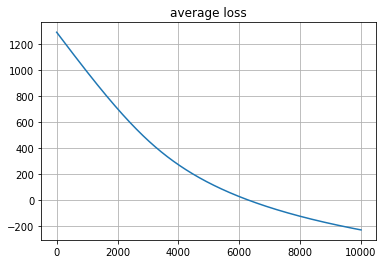

In [ ]:
plt.plot(np.arange(itr_num), avg_loss)
plt.title('average loss')
plt.grid()
plt.show()

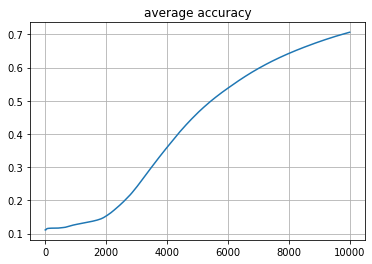

In [ ]:
plt.plot(np.arange(itr_num), avg_acc)
plt.title('average accuracy')
plt.grid()
plt.show()

In [ ]:
y_tst_hat = log_model(X_tst, beta)
acc_score(y_tst, y_tst_hat, cut_off)

0.9649122807017544

### sklearn 을 통한 로지스틱 회귀 모델 이용

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X_tr = X_tr[:, :-1]
X_tst = X_tst[:, :-1]

X_tr.shape

(398, 30)

In [ ]:
model = LogisticRegression()
model.fit(X_tr, y_tr)

model.coef_, model.intercept_

(array([[-0.30040355, -0.12591222, -0.27859202, -0.33756762, -0.0055591 ,
          0.46850546, -0.97078488, -1.18015756,  0.07983681,  0.14939934,
         -1.2832892 ,  0.09356772, -0.65431195, -0.89026452, -0.39004192,
          0.66625917,  0.21121555, -0.22019806,  0.32144958,  0.65257455,
         -0.925635  , -1.29501009, -0.67236821, -0.80317183, -0.44557821,
         -0.01323159, -0.84457247, -0.8285157 , -0.75679725, -0.1978604 ]]),
 array([-0.09588366]))

In [ ]:
y_hat_from_sklearn = model.predict(X_tst)

acc_score(y_tst, y_hat_from_sklearn, 0.5)

0.9883040935672515